In [2]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist

In [145]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [124]:
from matplotlib import pyplot as plt

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

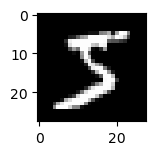

In [125]:
plt.subplot(330 + 1)
 # plot raw pixel data
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
print(trainy[0])
print(trainX[0])

In [126]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [146]:
trainX_flat = trainX.reshape(len(trainX), 784)
print(trainX_flat.shape)
testX_flat = testX.reshape(len(testX), 784)
print(testX_flat.shape)

(60000, 784)
(10000, 784)


In [147]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [129]:
model =keras.Sequential() 
model.add(Dense(784, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='sigmoid'))


In [130]:
#model = keras.Sequential([
#    keras.layers.Dense(10, input_shape(784,),activation='sigmoid')
#])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [131]:
model.fit(trainX_flat, trainy, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3812 - accuracy: 0.8921
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2771 - accuracy: 0.9187
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2472 - accuracy: 0.9268
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2314 - accuracy: 0.9309
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2081 - accuracy: 0.9376


In [ ]:
testy_hat = model.predict(testX_flat)

In [ ]:
testy_hat[0]

In [ ]:
testy[0]
#testX[0]
plt.imshow(testX[0], cmap=plt.get_cmap('gray'))

In [ ]:
 _, acc = model.evaluate(testX_flat, testy, verbose=0)
 print('> %.3f' % (acc * 100.0))

In [ ]:
testy.shape
testy_hat.shape

In [ ]:
import numpy as np 
y_predicted = model.predict(testX_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = confusion_matrix(labels=testy,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [148]:
testX_flat=testX_flat/255
trainX_flat=trainX_flat/255
model1 = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(trainX_flat, trainy, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 12ms/step - loss: 0.2197 - accuracy: 0.9345
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1064 - accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0745 - accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0625 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0531 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0435 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0401 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0332 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0321 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 24s 13m

In [143]:
model1.evaluate(testX_flat,testy)

#_, acc = model.evaluate(testX_flat, testy, verbose=0)
#print('> %.3f' % (acc * 100.0))


313/313 [==============================] - 2s 5ms/step - loss: 0.1091 - accuracy: 0.9740


[0.10910841077566147, 0.9739999771118164]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

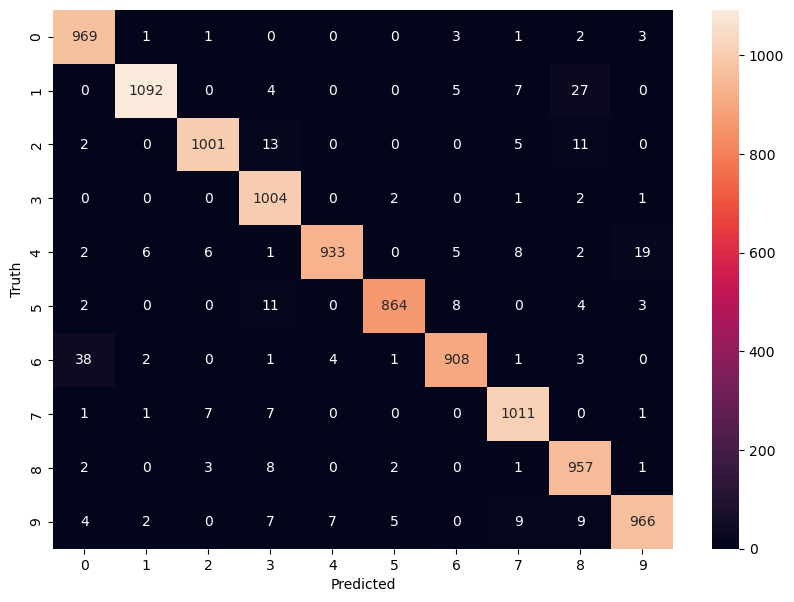

In [144]:
y_predicted = model1.predict(testX_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = confusion_matrix(labels=testy, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')